In [ ]:
#Question 1

import numpy as np

def compute_mean(X):
  # your code here *********************
  return np.mean(X)

X = [2 , 0 , 2 , 2 , 7, 4 , -2 , 5 , -1 , -1]
print("Mean: ", compute_mean(X))

Mean:  1.8


In [ ]:
#Question 2
def compute_median(X):
  size = len(X)
  X = np.sort(X)
  print(X)
  if(size % 2 == 0):
    return (X[size//2] + X[size//2 - 1])/2
  else:
    return X[size//2]

X = [1 , 5 , 4 , 4 , 9, 13]
print (" Median : ", compute_median ( X ) )

[ 1  4  4  5  9 13]
 Median :  4.5


In [ ]:
#Question 3
def compute_std(X):
  mean = compute_mean(X)
  variance = 0
  for x in X:
    variance += (x - mean)**2
  variance /= len(X)
  return variance**0.5

X = [ 171 , 176 , 155 , 167 , 169 , 182]
print(compute_std(X))

8.32666399786453


In [ ]:
#Question 4

def compute_correlation_coefficient(X, Y):
  N = len(X)
  numerator = N*X.dot(Y) - np.sum(X)*np.sum(Y)
  denominator = np.sqrt(N*np.sum(np.square(X))-np.sum(X)**2) \
    * np.sqrt(N*np.sum(np.square(Y))-np.sum(Y)**2)

  return np.round(numerator / denominator,2)
X = np.asarray([ -2 , -5 , -11 , 6 , 4 , 15 , 9])
Y = np.asarray([4 , 25 , 121 , 36 , 16 , 225 , 81])

print(compute_correlation_coefficient(X, Y))

0.42


# TABULAR DATA ANALYSIS

In [ ]:
# Download dataset :
!gdown 1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
import pandas as pd

data = pd.read_csv("advertising.csv")

def correlation(x, y):
  return compute_correlation_coefficient(x, y)

# # Your code here #

# Example usage :
x = data["TV"]
y = data ["Radio"]
corr_xy = correlation (x , y )
print ( f" Correlation between TV and Sales : { round ( corr_xy , 2)}")

Downloading...
From: https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 9.53MB/s]
 Correlation between TV and Sales : 0.05


In [ ]:
feature = ['TV', 'Radio', "Newspaper"]
for feature_1 in feature:
  for feature_2 in feature:
      correlation_value = correlation(data[feature_1], data[feature_2])
      print(f"Correlation between {feature_1} and {feature_2}: {round(correlation_value,2)}")

Correlation between TV and TV: 1.0
Correlation between TV and Radio: 0.05
Correlation between TV and Newspaper: 0.06
Correlation between Radio and TV: 0.05
Correlation between Radio and Radio: 1.0
Correlation between Radio and Newspaper: 0.35
Correlation between Newspaper and TV: 0.06
Correlation between Newspaper and Radio: 0.35
Correlation between Newspaper and Newspaper: 1.0


In [ ]:
x = data['Radio']
y = data['Newspaper']

result = np.corrcoef(x, y)
print(result)

[[1.         0.35410375]
 [0.35410375 1.        ]]


In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


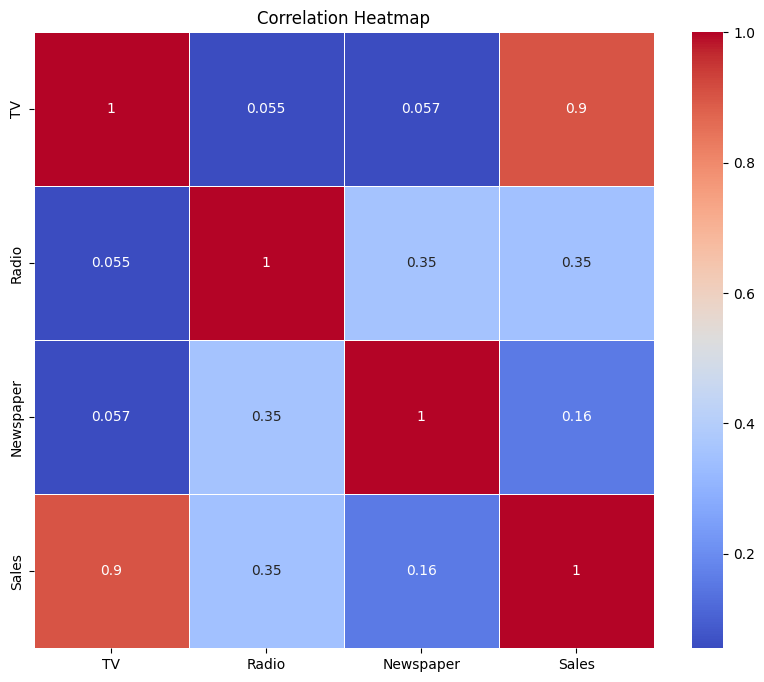

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5),
plt.title('Correlation Heatmap')
plt.show()

# TEXT RETRIEVAL

In [1]:
!gdown 1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6

Downloading...
From: https://drive.google.com/uc?id=1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6
To: /content/vi_text_retrieval.csv
100% 201k/201k [00:00<00:00, 83.7MB/s]


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
vi_data_df = pd.read_csv('/content/vi_text_retrieval.csv')
vi_data_df

,id,question,text
0,1570446247,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch..."
1,1570445661,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...
2,1570382095,Quân đội Hoa Kỳ gồm những lực lượng nào,Quân đội Hoa Kỳ hay Các lực lượng vũ trang Hoa...
3,1570382072,Ngọc Lan là ai,Ngọc Lan ( 28 tháng 12 năm 1956 - 6 tháng 3 20...
4,1570382037,Thu Phương từng được những giải thưởng nào,Cô được coi là một trong những ca sĩ thuộc thế...
...,...,...,...
495,1569486091,Dân số của Sóc Trăng đứng thứ mấy trong khu vự...,Sóc Trăng là một tỉnh ven biển thuộc đồng bằng...
496,1569486072,Các nguyên lý toán học của triết học tự nhiên ...,Đây là những điều cơ bản tiên quyết của cơ học...
497,1569486003,Biến đổi khí hậu Trái Đất là gì,Biến đổi khí hậu là những biến đổi trong môi t...
498,1569485614,Phanxicô Xaviê Trương Bửu Diệp mất vào năm nào,Phanxicô Xaviê Trương Bửu Diệp ( 1 tháng 1 năm...


In [6]:
content = vi_data_df['text']
content = [doc.lower() for doc in content]

In [7]:
tfidf_vectorizer = TfidfVectorizer()
content_embedded = tfidf_vectorizer.fit_transform(content)

In [9]:
content_embedded.toarray()[7][0]

0.31126580760710637

In [13]:
def tfidf_search(question, tfidf_vectorizer, top_d = 5):
  query_embedded = tfidf_vectorizer.transform([question.lower()])
  cosine_scores = cosine_similarity(query_embedded, content_embedded).reshape((-1,))

  result = []
  for idx in cosine_scores.argsort()[-top_d:][::-1]:
    doc_score = {
        'id': idx,
        'cosine_score': cosine_scores[idx]
    }
    result.append(doc_score)
  return result

In [14]:
question = vi_data_df.iloc[0]['question']
result = tfidf_search(question, tfidf_vectorizer, top_d = 5)
result[0]['cosine_score']

0.6279910475266974

In [22]:
def corr_search(question, tfidf_vectorizer, top_d = 5):
  query_embedded = tfidf_vectorizer.transform([question.lower()])
  corr_scores = np.corrcoef(
      query_embedded.toarray()[0],
      content_embedded.toarray()
      )
  corr_scores = corr_scores[0][1:]
  result = []
  for idx in corr_scores.argsort()[-top_d:][::-1]:
    doc = {
        'id': idx,
        'corr_score': corr_scores[idx]
    }
    result.append(doc)
  return result

In [23]:
question = vi_data_df.iloc[0]['question']
result = corr_search(question, tfidf_vectorizer, top_d = 5)
result[1]['corr_score']

0.20734246471973258